- Coursework :

In [1]:
# Only 3 libraries (numpy, pandas and matplotlib.pyplot) used in Coursework.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Task 1:
# All months in Array
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Average monthly temperatures for 3 cities (in °C) different 3 countries (Japan, Russia, Canada)
cities = ["Tokyo","Irkutsk","Toronto"]
temps_tokyo   = np.array([    4,    5,  8.5,13.4, 18.2, 21.5, 25.3, 26.5, 23.2, 17.7, 12.1,  6.7], dtype=float)     # Tokyo
temps_irkutsk = np.array([-19.6,-15.5, -6.4,   3,   10, 17.3, 19.2, 16.9, 10.3,  1.7, -7.9,-16.1], dtype=float)     # Irkutsk
temps_toronto = np.array([ -4.4, -4.4, -0.3, 5.8, 12.3, 18.2, 21.9, 21.5, 18.2, 11.4,    5, -0.6], dtype=float)     # Toronto
# Combine three cities
temps_cities = np.array([temps_tokyo,temps_irkutsk,temps_toronto], dtype=float)

# Dataset Array
print(f"The combination array of three cities: \n{temps_cities}\n")

# 2D Dataset
df = pd.DataFrame({'Month': months, 'Tokyo': temps_tokyo, 'Irkutsk': temps_irkutsk, 'Toronto': temps_toronto})
print(f"{df}\n")

# Overall mean value in 3 Cities
overall_mean = np.mean(temps_cities)
print(f"Three Cities:\nOverall Mean Value: {round(overall_mean,2)}°C")

# Overall standard deviation (Population) in 3 Cities
over_std = np.std(temps_cities, ddof=0)
print(f"Overall Standard Deviation (Population): {round(over_std,2)}°C")

# Overall standard deviation (Sample) in 3 Cities
over_std = np.std(temps_cities, ddof=1)
print(f"Overall Standard Deviation (Sample): {round(over_std,2)}°C")

# Mean value per city
city_mean = np.mean(temps_cities,axis=1) 
# Standard deviation per city (Population)
city_std  = np.std(temps_cities,axis=1, ddof=0)
# Standard deviation per city (Sample)
city_std  = np.std(temps_cities,axis=1, ddof=1)

# Display the result per city in for loop
for city, mean, std in zip(cities, city_mean, city_std):
    print(f"\n{city}:\n     Mean Temperature: {mean:.2f}°C\n     Standard Deviation (Population): {std:.3f}°C\n     Standard Deviation (Sample): {std:.3f}°C")

The combination array of three cities: 
[[  4.    5.    8.5  13.4  18.2  21.5  25.3  26.5  23.2  17.7  12.1   6.7]
 [-19.6 -15.5  -6.4   3.   10.   17.3  19.2  16.9  10.3   1.7  -7.9 -16.1]
 [ -4.4  -4.4  -0.3   5.8  12.3  18.2  21.9  21.5  18.2  11.4   5.   -0.6]]

   Month  Tokyo  Irkutsk  Toronto
0    Jan    4.0    -19.6     -4.4
1    Feb    5.0    -15.5     -4.4
2    Mar    8.5     -6.4     -0.3
3    Apr   13.4      3.0      5.8
4    May   18.2     10.0     12.3
5    Jun   21.5     17.3     18.2
6    Jul   25.3     19.2     21.9
7    Aug   26.5     16.9     21.5
8    Sep   23.2     10.3     18.2
9    Oct   17.7      1.7     11.4
10   Nov   12.1     -7.9      5.0
11   Dec    6.7    -16.1     -0.6

Three Cities:
Overall Mean Value: 8.32°C
Overall Standard Deviation (Population): 11.93°C
Overall Standard Deviation (Sample): 12.09°C

Tokyo:
     Mean Temperature: 15.17°C
     Standard Deviation (Population): 8.023°C
     Standard Deviation (Sample): 8.023°C

Irkutsk:
     Mean Temperat

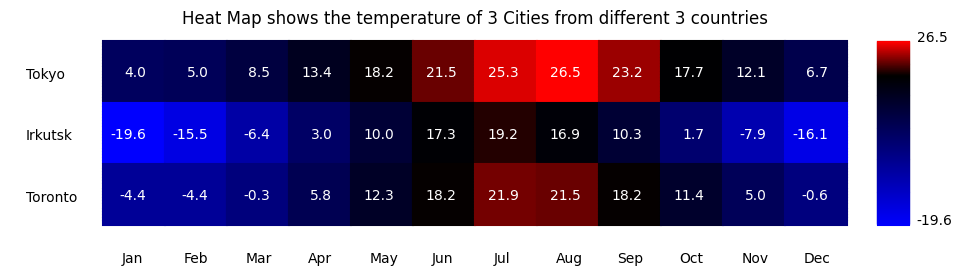

In [89]:
# Task 2:
# DrawBox in each row and column
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

# Loop the user input
while True:
    try:
        user_input = input("Enter the threshold temperature (integer, float, or 'mean'): ")
        # Check if input is "mean"
        if user_input.lower() == "mean":
            threshold = np.mean(temps_cities)
            break

        threshold = float(user_input)
        break
    except ValueError:
        print("Invalid input! Please enter a valid number.")

Min, Max = np.min(temps_cities), np.max(temps_cities)

# Ensure threshold is within the valid range
if threshold < Min:
    threshold = Min
    print(f"Threshold adjusted to minimum value: {threshold}")
elif threshold > Max:
    threshold = Max
    print(f"Threshold adjusted to maximum value: {threshold}")

# Plot Size
figure = plt.figure(figsize=(12,3))
plt.axis([0, 600, 0, 150])

# Initialise box size and offsets
BoxSize = int(40)
OffsetX = int(13)
OffsetY = int(8)

# Visualise the heat map
for i in range(0, temps_cities.shape[0]):
    for j in range(0, temps_cities.shape[1]):
        if temps_cities[i,j] <= threshold:
            denom = threshold - Min
            if denom == 0:
                intensity = 0
            else:
                intensity = int(((threshold - temps_cities[i, j]) / denom) * 255)
            DrawBox(60+BoxSize*j, 105-BoxSize*i, BoxSize, 0, 0, intensity)
        else:
            denom = Max - threshold
            if denom == 0:
                intensity = 0
            else:
                intensity = int(((temps_cities[i, j] - threshold) / denom) * 255)
            DrawBox(60+BoxSize*j, 105-BoxSize*i, BoxSize, intensity, 0, 0)
        plt.text(OffsetX+75+BoxSize*j, OffsetY+113-BoxSize*i, str(temps_cities[i, j]), color='#FFFFFF',ha='right')

# Define the height range for the color scale
height_min = 25
height_max = 144

# Function to map temperature values to color scale height
def map_to_height(value, Min, Max, height_min, height_max):
    return height_min + (value - Min) / (Max - Min) * (height_max - height_min)

# Generate the color scale (Blue to Red) within the defined height range
# Blue gradient
for i in np.arange(Min, threshold, 0.1):
    # Normalize
    intensity = max(0, min(1, (threshold - i) / (threshold - Min)))
    y_pos = map_to_height(i, Min, Max, height_min, height_max)
    # BLUE
    plt.plot([560, 580], [y_pos, y_pos], color=(0, 0, intensity))

# Red gradient
for i in np.arange(threshold, Max, 0.1):
    # Normalize
    intensity = max(0, min(1, (i - threshold) / (Max - threshold)))
    y_pos = map_to_height(i, Min, Max, height_min, height_max)
    # RED
    plt.plot([560, 580], [y_pos, y_pos], color=(intensity, 0, 0))


# Labels for Min, Max, and Threshold
plt.text(585, height_min, str(Min), color="black")
plt.text(585, height_max, str(Max), color="black")

# Hide axis for a cleaner look
plt.axis("off")

# Define x-coordinates for text placement
# Start at 72, increment by 40
position = range(72, 520, 40)
# Loop through months and their corresponding position
for i, month in enumerate(months):
    plt.text(position[i], 0, month)

cities_position = range(120 , 10 , -40)
for i, city in enumerate(cities):
    plt.text(10, cities_position[i], city)

# Generate the chart
plt.title("Heat Map shows the temperature of 3 Cities from different 3 countries")
plt.show()
# figure.savefig("heatmap_japan-russia-canada.jpg")
# plt.close()

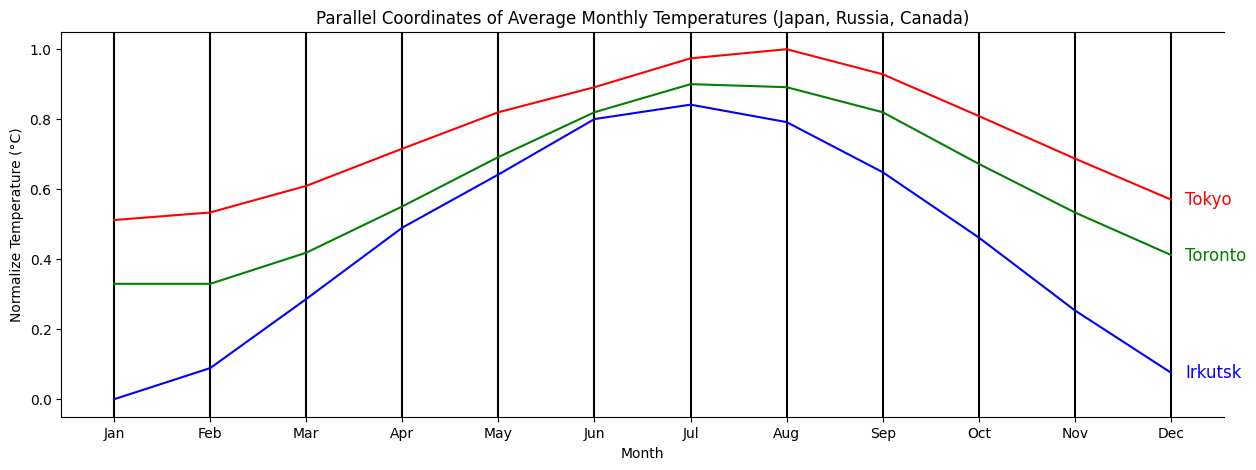

In [ ]:
# Task 3:
# Plot Parallel Coordinates
plt.figure(figsize=(15, 5))

# Normalize data using NumPy
temps_normalize = (temps_cities - np.min(temps_cities)) / (np.max(temps_cities) - np.min(temps_cities))

# Define colors for each city (Japan - Russia - Canada)
colors = ['red', 'blue', 'green']

# Give the vertical line each column
for m in months:
    plt.axvline(x=m, color='black', linestyle='-', alpha=1)

# Create a line based on value
for city, (temp_data,color) in enumerate(zip(temps_normalize,colors)):
    line, = plt.plot(months, temp_data, label=cities[city], color = color)
    plt.text(len(months) - 0.85, temp_data[-1], cities[city], color=line.get_color(), fontsize=12, verticalalignment='center')

# Remove the vertical line at the end of right.
plt.gca().spines['right'].set_visible(False)
plt.title("Parallel Coordinates of Average Monthly Temperatures (Japan, Russia, Canada)")
plt.xlabel("Month")
plt.ylabel("Normalize Temperature (°C)")
plt.show()


